### 2012-2021 SEISMIC ACTIVITY IN CHILE'S AND JAPAN'S OFFSHORE AREA

##### DOES MAGNITUDE AND DEPTH CORRELATIONATED IN BOTH AREAS?
##### Daniel Eldan R. - Independent Data Scientist


Data Source: USGS Earthquake Catalogue - https://earthquake.usgs.gov/earthquakes/search

Options:

Magnitude: +0.0Datetime: from 2012-01-01 00:00:00 to 2021-12-31 23:59:59

Geographic region:

Chilean Area:

[-56.717, -17.246] Latitude

[-84.727, -65.742] Longitude

Japan Area:

[7.362, 46.339] Latitude

[-232.013, -213.047] Longitude


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats 
import re

In [2]:
#READ DATA
df = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")

df = df.sort_values(by="time", ascending=True)
df = df[["mag","depth","time"]]

df2 = df2.sort_values(by="time", ascending=True)
df2 = df2[["mag","depth","time"]]
    
#Get just HH time
hora = []
for i in df["time"]:
    hora.append(re.findall('(?<=T)\w+',i))
df[["time"]] = hora
#df.head()
hora = []
for i in df2["time"]:
    hora.append(re.findall('(?<=T)\w+',i))
df2[["time"]] = hora
#df2.head()


In [3]:
#Just intersting data
# Chilean area magnitudes
magnitudes = pd.Series(df["mag"].value_counts())
magnitudes = magnitudes.sort_values(ascending=False)
magnitudes.head()

4.3    1357
4.2    1336
4.4    1222
4.1    1119
4.5    1017
Name: mag, dtype: int64

In [4]:
#Just intersting data
# Chilean area depths
depths = pd.Series(df["depth"].value_counts())
depths = depths.sort_values(ascending=False)
depths.head()

10.0    1091
35.0     172
20.0      25
25.0      21
21.0      16
Name: depth, dtype: int64

In [5]:
#Just intersting data
# Chilean area day hour
horas = pd.Series(df["time"].value_counts())
horas = horas.sort_index(ascending=True)
horas.head()

00    463
01    437
02    462
03    461
04    435
Name: time, dtype: int64

In [6]:
#Just intersting data
# Japan area magnitudes
magnitudes = pd.Series(df2["mag"].value_counts())
magnitudes = magnitudes.sort_values(ascending=False)
magnitudes.head()

4.5    1955
4.4    1913
4.6    1728
4.3    1617
4.2    1246
Name: mag, dtype: int64

In [7]:
#Just intersting data
# Japan area day hour
horas = pd.Series(df2["time"].value_counts())
horas = horas.sort_index(ascending=True)
horas.head()

00    561
01    578
02    573
03    560
04    576
Name: time, dtype: int64

In [8]:
#Just intersting data
# Japan area depths
depths = pd.Series(df2["depth"].value_counts())
depths = depths.sort_values(ascending=False)
depths.head()

10.0    2655
35.0     723
9.0       15
31.0      13
20.0      12
Name: depth, dtype: int64

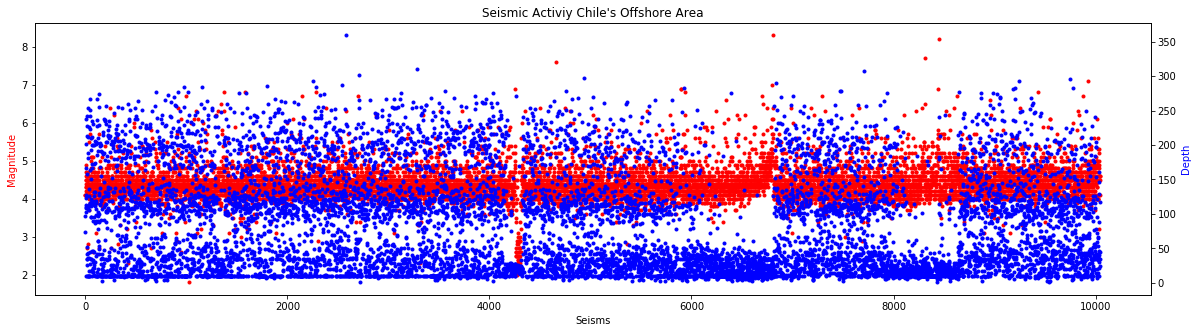

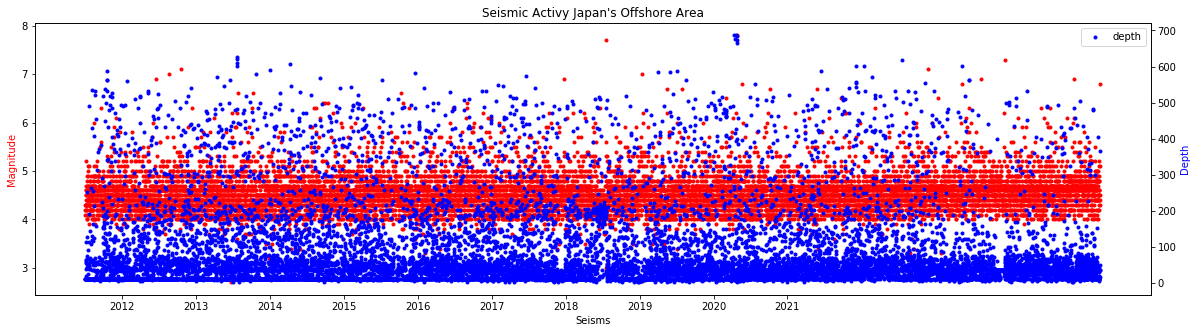

In [14]:
#just interesting data
#playing with the plots

fig, ax1 = plt.subplots()

#Chilean plot
ax1.plot(df["mag"], ".",color="red", label="magnitudes")
ax1.set_xlabel("Seisms")
ax1.set_ylabel("Magnitude", color="red")
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(df["depth"], ".",color="blue")
ax2.set_ylabel("Depth", color="blue")
ax2.tick_params(axis='y')

plt.rcParams["figure.figsize"] = (20,5)
plt.title("Seismic Activiy Chile's Offshore Area")

#Japan Plot
fig1, ax3 = plt.subplots()

ax3.plot(df2["mag"], ".",color="red", label="magnitudes")
ax3.set_xlabel("Seisms")
ax3.set_ylabel("Magnitude", color="red")
ax3.tick_params(axis='y')

ax4 = ax3.twinx()
ax4.plot(df2["depth"], ".",color="blue")
ax4.set_ylabel("Depth", color="blue")
ax4.tick_params(axis='y')

a = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
b = [i+500 for i in a]
Years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

plt.legend()
plt.xticks(b, Years)
plt.rcParams["figure.figsize"] = (20,5)
plt.title("Seismic Activy Japan's Offshore Area")

#Lets see it
plt.show()


# FINAL ANALYSIS

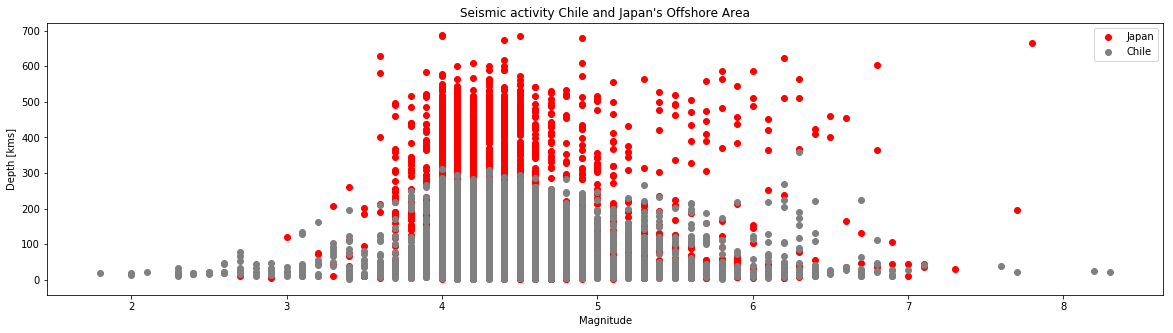

In [10]:


plt.scatter(df2["mag"],df2["depth"], color="red", label="Japan")
plt.scatter(df["mag"],df["depth"], color="grey", label="Chile")

plt.rcParams["figure.figsize"] = (15,5)
plt.xlabel("Magnitude")
plt.ylabel("Depth [kms]")
plt.title("Seismic activity Chile and Japan's Offshore Area")
plt.legend()

plt.savefig("Assignment4-Image.png",dpi=300)

plt.show()

In [ ]:
# Hope you enjoy it.